In [1]:
# START

# Import packages and load the full dataset
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Ignore the warnings
warnings.filterwarnings('ignore')

# Load the data
train = pd.read_csv('train.csv')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

In [3]:
# Missing data

# check missingness:
missingData = train.isnull().mean(axis=0)

# remove is greater than 30%
#.index and gives the column names
missingIndex = missingData[missingData>0.3].index
missingIndex

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [4]:
# Get missing data columns and rename to working

workingDf = train.copy()

workingDf.isna().sum().loc[workingDf.isna().sum()>0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<AxesSubplot:>

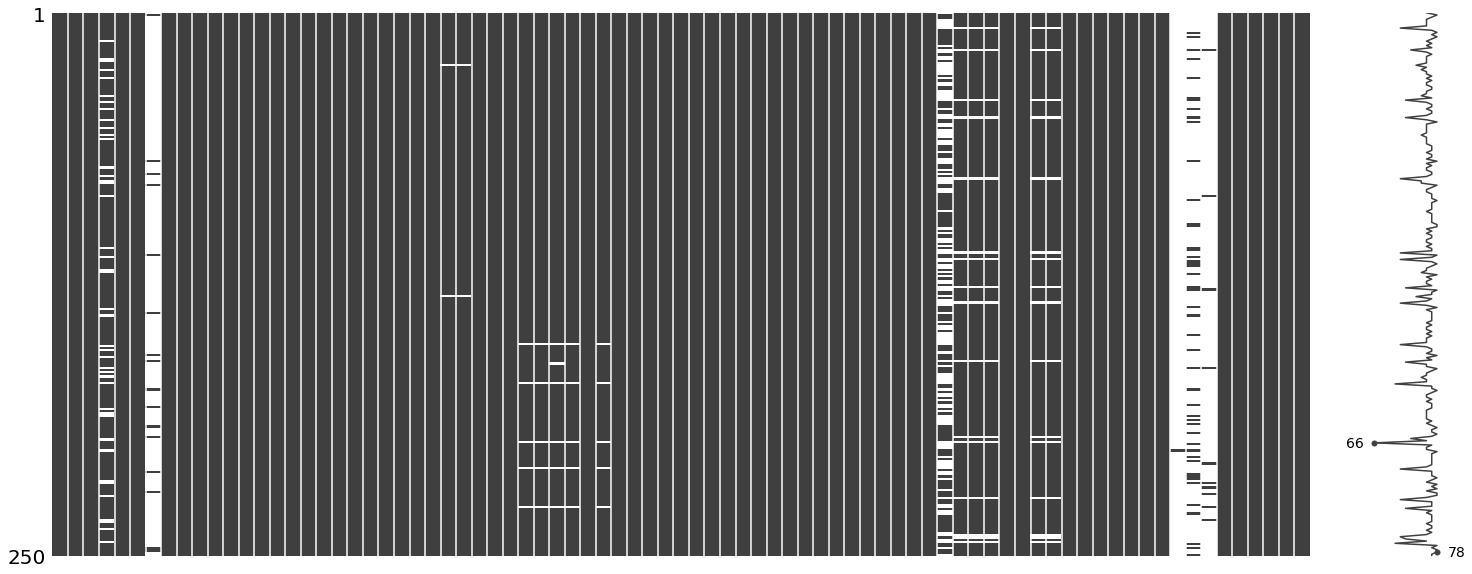

In [5]:
# Check missingness

import missingno as msno
%matplotlib inline
msno.matrix(workingDf.sample(250))

In [6]:
#Remove NA from PoolQC
workingDf.loc[pd.Series(workingDf.PoolQC.isna()), 'PoolQC'] = 'NoPool'

# Remove NA from MiscFeature
workingDf.loc[pd.Series(workingDf.MiscFeature.isna()), 'MiscFeature'] = 'None'

# Remove NA from Alley
workingDf.loc[pd.Series(workingDf.Alley.isna()), 'Alley'] = 'NoAlley'

# Remove NA from Fence
workingDf.loc[pd.Series(workingDf.Fence.isna()), 'Fence'] = 'Fence'

# Remove NA from FireplaceQC
workingDf.loc[pd.Series(workingDf.FireplaceQu.isna()), 'FireplaceQu'] = 'NoFirePlace'

In [7]:
workingDf.isna().sum().loc[workingDf.isna().sum()>0].sort_values(ascending = False)
# workingDf.head()

workingDf.shape

(1460, 81)

False    1201
True      259
Name: LotFrontage, dtype: int64


,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260


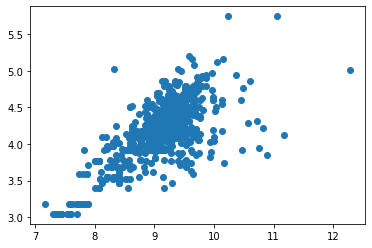

In [8]:
# Compare frontage to lot area!

print(workingDf.LotFrontage.isnull().value_counts())
workingDf.LotFrontage.isnull().sum()


lotFrontageByArea = workingDf[['LotFrontage', 'LotArea']]

plt.scatter(np.log(workingDf['LotArea']), np.log(workingDf['LotFrontage']))

lotFrontageByArea.head()



In [9]:
lotFrontageByArea.isnull().sum()

LotFrontage    259
LotArea          0
dtype: int64

In [10]:
# Indecies of where LotFrontage is Na
lotFrontageByArea.LotArea[lotFrontageByArea.LotFrontage.isnull()]

7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1429    12546
1431     4928
1441     4426
1443     8854
1446    26142
Name: LotArea, Length: 259, dtype: int64

In [11]:
lotFrontageByArea.head()

lotFrontageNoNa = lotFrontageByArea.dropna()

lotFrontageNoNa.isna().sum()

LotFrontage    0
LotArea        0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lotByAreaModel = linear_model.LinearRegression()
lotByAreaModel.fit(lotFrontageNoNa[['LotArea']], lotFrontageNoNa.LotFrontage)

#Spint into missing and not missing
workingDfFrontageNas = workingDf[workingDf.LotFrontage.isna()]
workingDfFrontageNoNas = workingDf[~workingDf.LotFrontage.isna()]

# Must use Data frame
workingDfFrontageNas.LotFrontage = lotByAreaModel.predict(workingDfFrontageNas[['LotArea']])

# Must concat a list!!!
workingDfImputedFrontage = pd.concat([workingDfFrontageNas, workingDfFrontageNoNas], axis = 0)

LinearRegression()

In [16]:
            # Do ANOTHER model with and without the imputed column to see if it imporves the model or not!!!!


# Do encoding but in a NEW data set, ordinal AND label!
workingDf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
workingDfImputedFrontage.isna().sum().loc[workingDfImputedFrontage.isna().sum()>0].sort_values(ascending = False)

workingImputed = workingDfImputedFrontage.copy()

workingImputed.isna().sum().loc[workingImputed.isna().sum()>0].sort_values(ascending=False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [18]:
# clean up more Na's

workingImputed.loc[pd.Series(workingImputed.GarageCond.isna()), 'GarageCond'] = 'NoGarage'
workingImputed.loc[pd.Series(workingImputed.GarageQual.isna()), 'GarageQual'] = 'NoGarage'
workingImputed.loc[workingImputed.GarageFinish.isna(), 'GarageFinish'] = 'NoGarage'
workingImputed.loc[workingImputed.GarageYrBlt.isna(), 'GarageYrBlt'] = 'NoGarage'
workingImputed.loc[workingImputed.BsmtFinType2.isna(), 'GarageType'] = 'NoGarage'
workingImputed.loc[workingImputed.BsmtFinType2.isna(), 'BsmtFinType2'] = 'NoBasement'
workingImputed.loc[workingImputed.BsmtExposure.isna(), 'BsmtExposure'] = 'NoBasement'
workingImputed.loc[workingImputed.BsmtFinType2.isna(), 'BsmtFinType1'] = 'NoBasement'
workingImputed.loc[workingImputed.BsmtExposure.isna(), 'BsmtCond'] = 'NoBasement'
workingImputed.loc[workingImputed.BsmtExposure.isna(), 'BsmtQual'] = 'NoBasement'
workingImputed.loc[workingImputed.MasVnrArea.isna(), 'MasVnrArea'] = 'NoMasonry'
workingImputed.loc[workingImputed.MasVnrArea.isna(), 'MasVnrType'] = 'NoMasonry'

# Drop last row with missing data, Electrical 
workingImputedNoNas = workingImputed.dropna()

# Drop Id column
workingImputedNoNas.drop("Id", inplace = True, axis=1)

# Sanity check missing
workingImputedNoNas.isna().sum().loc[workingImputedNoNas.isna().sum()>0].sort_values(ascending=False)


Series([], dtype: int64)

In [19]:

workingImputedNoNas.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,70.611845,10382,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,Fence,Shed,350,11,2009,WD,Normal,200000
12,20,RL,73.988641,12968,Pave,NoAlley,IR2,Lvl,AllPub,Inside,...,0,NoPool,Fence,None,0,9,2008,WD,Normal,144000
14,20,RL,71.314365,10920,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,GdWo,None,0,5,2008,WD,Normal,157000
16,20,RL,71.733527,11241,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,...,0,NoPool,Fence,Shed,700,3,2010,WD,Normal,149000
24,20,RL,67.822659,8246,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,NoPool,MnPrv,None,0,5,2010,WD,Normal,154000


In [20]:
# Show final shape
workingImputedNoNas.shape

(1340, 80)

In [21]:
# Rename, workingClean


workingClean = workingImputedNoNas.copy()
workingClean.OverallQual
workingClean.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,70.611845,10382,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,Fence,Shed,350,11,2009,WD,Normal,200000
12,20,RL,73.988641,12968,Pave,NoAlley,IR2,Lvl,AllPub,Inside,...,0,NoPool,Fence,None,0,9,2008,WD,Normal,144000
14,20,RL,71.314365,10920,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,GdWo,None,0,5,2008,WD,Normal,157000
16,20,RL,71.733527,11241,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,...,0,NoPool,Fence,Shed,700,3,2010,WD,Normal,149000
24,20,RL,67.822659,8246,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,NoPool,MnPrv,None,0,5,2010,WD,Normal,154000


In [22]:
# Now Dummify to, workingDummies

workingDummies = workingClean.copy()
workingDummies = pd.get_dummies(workingDummies)


print(workingDummies.shape)
workingDummies.head()


print(workingDummies.isna().sum().loc[workingDummies.isna().sum()>0].sort_values(ascending=False))

### HOW DID I LOSE 100 rows???
### WHERE DID THE MISSING DATA COME FROM?

workingDummies.head()

(1340, 713)
Series([], dtype: int64)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
7,60,70.611845,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
12,20,73.988641,12968,5,6,1962,1962,737,0,175,...,0,0,0,1,0,0,0,0,1,0
14,20,71.314365,10920,6,5,1960,1960,733,0,520,...,0,0,0,1,0,0,0,0,1,0
16,20,71.733527,11241,6,7,1970,1970,578,0,426,...,0,0,0,1,0,0,0,0,1,0
24,20,67.822659,8246,5,8,1968,2001,188,668,204,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Replace NAs in Dummies Set with 0???

print(workingDummies.isna().sum().loc[workingDummies.isna().sum()>0].sort_values(ascending=False))

Series([], dtype: int64)


In [24]:
#split feature and salePrice for both data sets
salePriceClean = workingClean.SalePrice
homeFeaturesClean = workingClean.copy().drop("SalePrice", axis = 1)

salePriceDummies = workingDummies.SalePrice
homeFeaturesDummies = workingDummies.copy().drop("SalePrice", axis = 1)

# Check features
print(workingClean.shape)
print(workingDummies.shape)


print(homeFeaturesDummies.isna().sum().loc[homeFeaturesDummies.isna().sum()>0].sort_values(ascending=False))


# Removed rows from clean????



(1340, 80)
(1340, 713)
Series([], dtype: int64)


In [25]:
pd.set_option('display.max_rows', None)

workingClean['GarageYrBlt'].sort_values()

93      1900
653     1906
848     1908
809     1910
246     1910
740     1910
1235    1914
735     1914
482     1915
74      1915
1387    1916
187     1916
456     1916
1197    1916
1443    1916
417     1918
197     1918
98      1920
30      1920
1328    1920
181     1920
1362    1920
1001    1920
1120    1920
1186    1920
565     1920
531     1920
29      1920
676     1920
398     1920
329     1920
92      1921
696     1921
1178    1921
998     1922
1414    1922
1385    1922
555     1922
669     1922
1012    1923
154     1923
807     1923
380     1924
677     1924
202     1924
1192    1925
860     1925
912     1925
991     1925
1092    1925
314     1925
497     1925
458     1925
1399    1925
1376    1925
1177    1926
437     1926
519     1926
1135    1926
164     1926
514     1926
413     1927
1432    1928
576     1928
508     1928
1145    1928
1400    1929
1343    1929
21      1930
1100    1930
671     1930
596     1930
442     1930
1132    1930
1149    1930
328     1930
146     1931

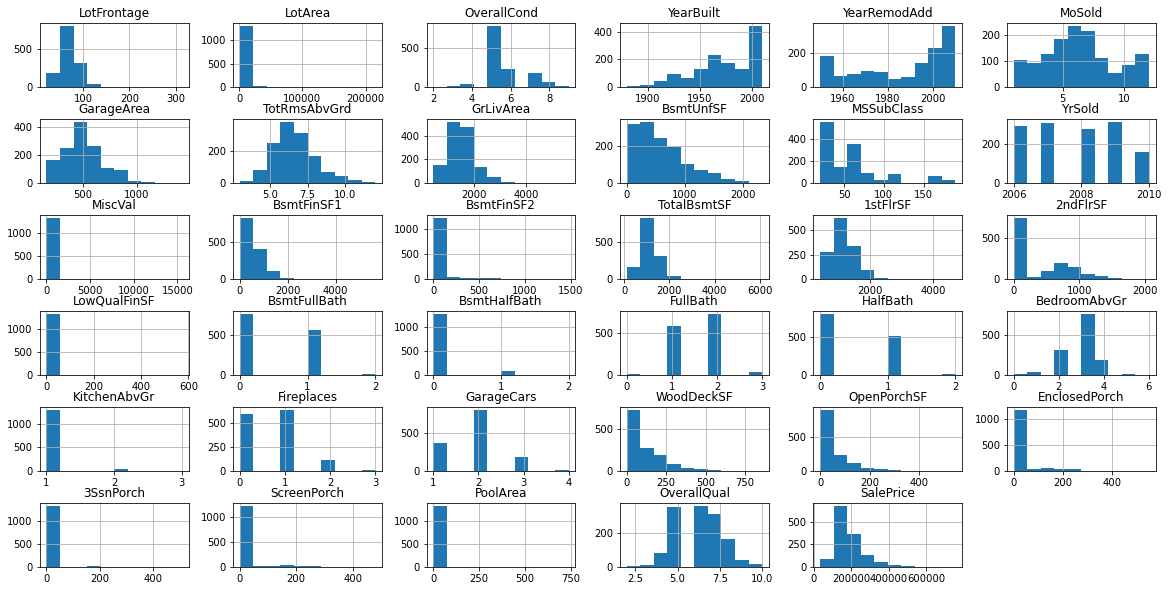

In [26]:
# Split into contious and Categorical
workingNumeric = workingClean[['GarageYrBlt', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',  'MoSold', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea', 'BsmtUnfSF',
                              'MSSubClass', 'YrSold', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 
                              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'OverallQual', 'MasVnrArea']]

workingNumeric['SalePrice'] = salePriceClean


fig = plt.figure(figsize=[20,10])

# get current axis = gca
ax = fig.gca()

# we here will apply to the last one described...
workingNumeric.hist(ax = ax)

plt.subplots_adjust(hspace=0.5) 


<AxesSubplot:>

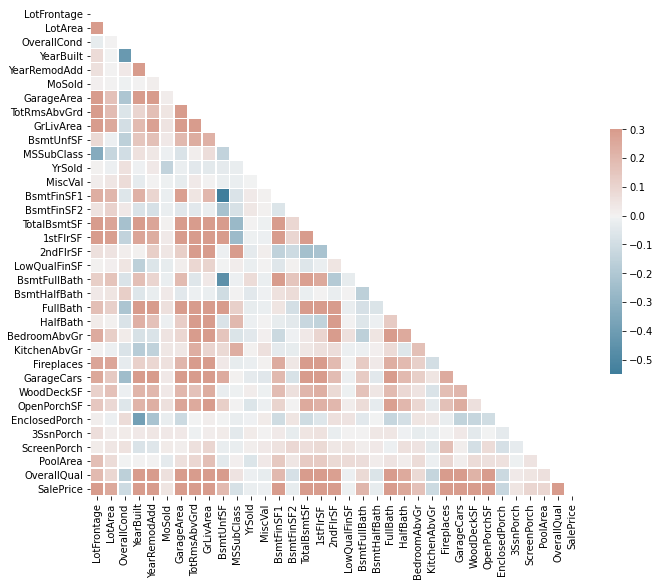

In [48]:
workingNumeric

# sea.set_theme(style="white")

# Generate a large random dataset
rs = workingNumeric

d = pd.DataFrame(data=workingNumeric, columns=list(workingNumeric.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sea.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sea.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

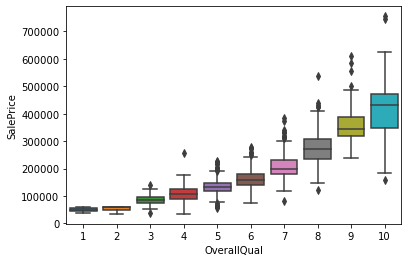

In [49]:
sea.boxplot(data=workingDf, x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

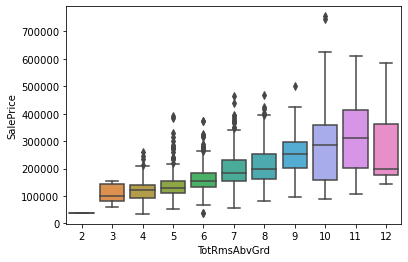

In [50]:
sea.boxplot(data=workingDf, x='TotRmsAbvGrd', y='SalePrice')

In [51]:
workingDf = workingDf[workingDf.TotRmsAbvGrd != 14]

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

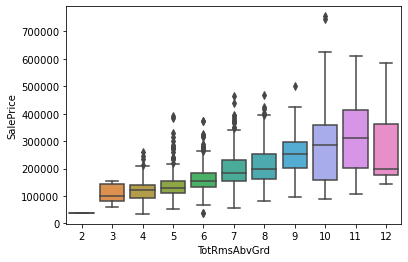

In [31]:
sea.boxplot(data=workingDf, x='TotRmsAbvGrd', y='SalePrice')

In [ ]:
# LotFrontage
# YearBuilt
# YearRemodAdd
# GarageArea
# TotRmsAbvGrnd
# BsmtFinSF2
# TotalBsmtSF
# 1stFlrSF
# 2ndFlrSF
# FullBath
# Fireplaces
# GarageCars
# WoodDecksSF
# OpenPorchSF
# OverallQual

In [52]:
list(workingNumeric.columns)

['GarageYrBlt',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MoSold',
 'GarageArea',
 'TotRmsAbvGrd',
 'GrLivArea',
 'BsmtUnfSF',
 'MSSubClass',
 'YrSold',
 'MiscVal',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'OverallQual',
 'MasVnrArea',
 'SalePrice']

workingSmall.value_counts().plot(kind='bar')


In [53]:
# Split into contious and categorical
workingCategorical = workingClean[['MSZoning', 'SaleType', 'GarageType', 'SaleCondition', 'Street','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',  'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
       'Functional',   'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'GarageYrBlt']]

workingCategorical['SalePrice'] = salePriceClean


### HOW DO DO ALL THESE AS BOX PLOTS?

In [54]:
workingCategorical.head()

,MSZoning,SaleType,GarageType,SaleCondition,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageQual,GarageCond,PavedDrive,LotShape,LandContour,Utilities,LotConfig,LandSlope,GarageYrBlt,SalePrice
7,RL,WD,Attchd,Normal,Pave,NWAmes,PosN,Norm,1Fam,2Story,...,TA,TA,Y,IR1,Lvl,AllPub,Corner,Gtl,1973,200000
12,RL,WD,Detchd,Normal,Pave,Sawyer,Norm,Norm,1Fam,1Story,...,TA,TA,Y,IR2,Lvl,AllPub,Inside,Gtl,1962,144000
14,RL,WD,Attchd,Normal,Pave,NAmes,Norm,Norm,1Fam,1Story,...,TA,TA,Y,IR1,Lvl,AllPub,Corner,Gtl,1960,157000
16,RL,WD,Attchd,Normal,Pave,NAmes,Norm,Norm,1Fam,1Story,...,TA,TA,Y,IR1,Lvl,AllPub,CulDSac,Gtl,1970,149000
24,RL,WD,Attchd,Normal,Pave,Sawyer,Norm,Norm,1Fam,1Story,...,TA,TA,Y,IR1,Lvl,AllPub,Inside,Gtl,1968,154000


<AxesSubplot:>

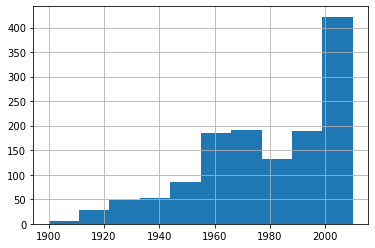

In [55]:
# Missing from above for some reason


workingCategorical.GarageYrBlt.hist()



<AxesSubplot:>

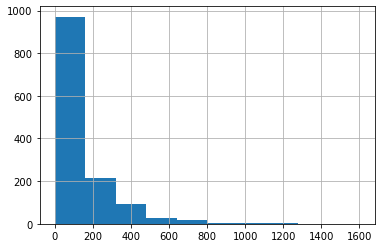

In [56]:
workingCategorical.MasVnrArea.hist()

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

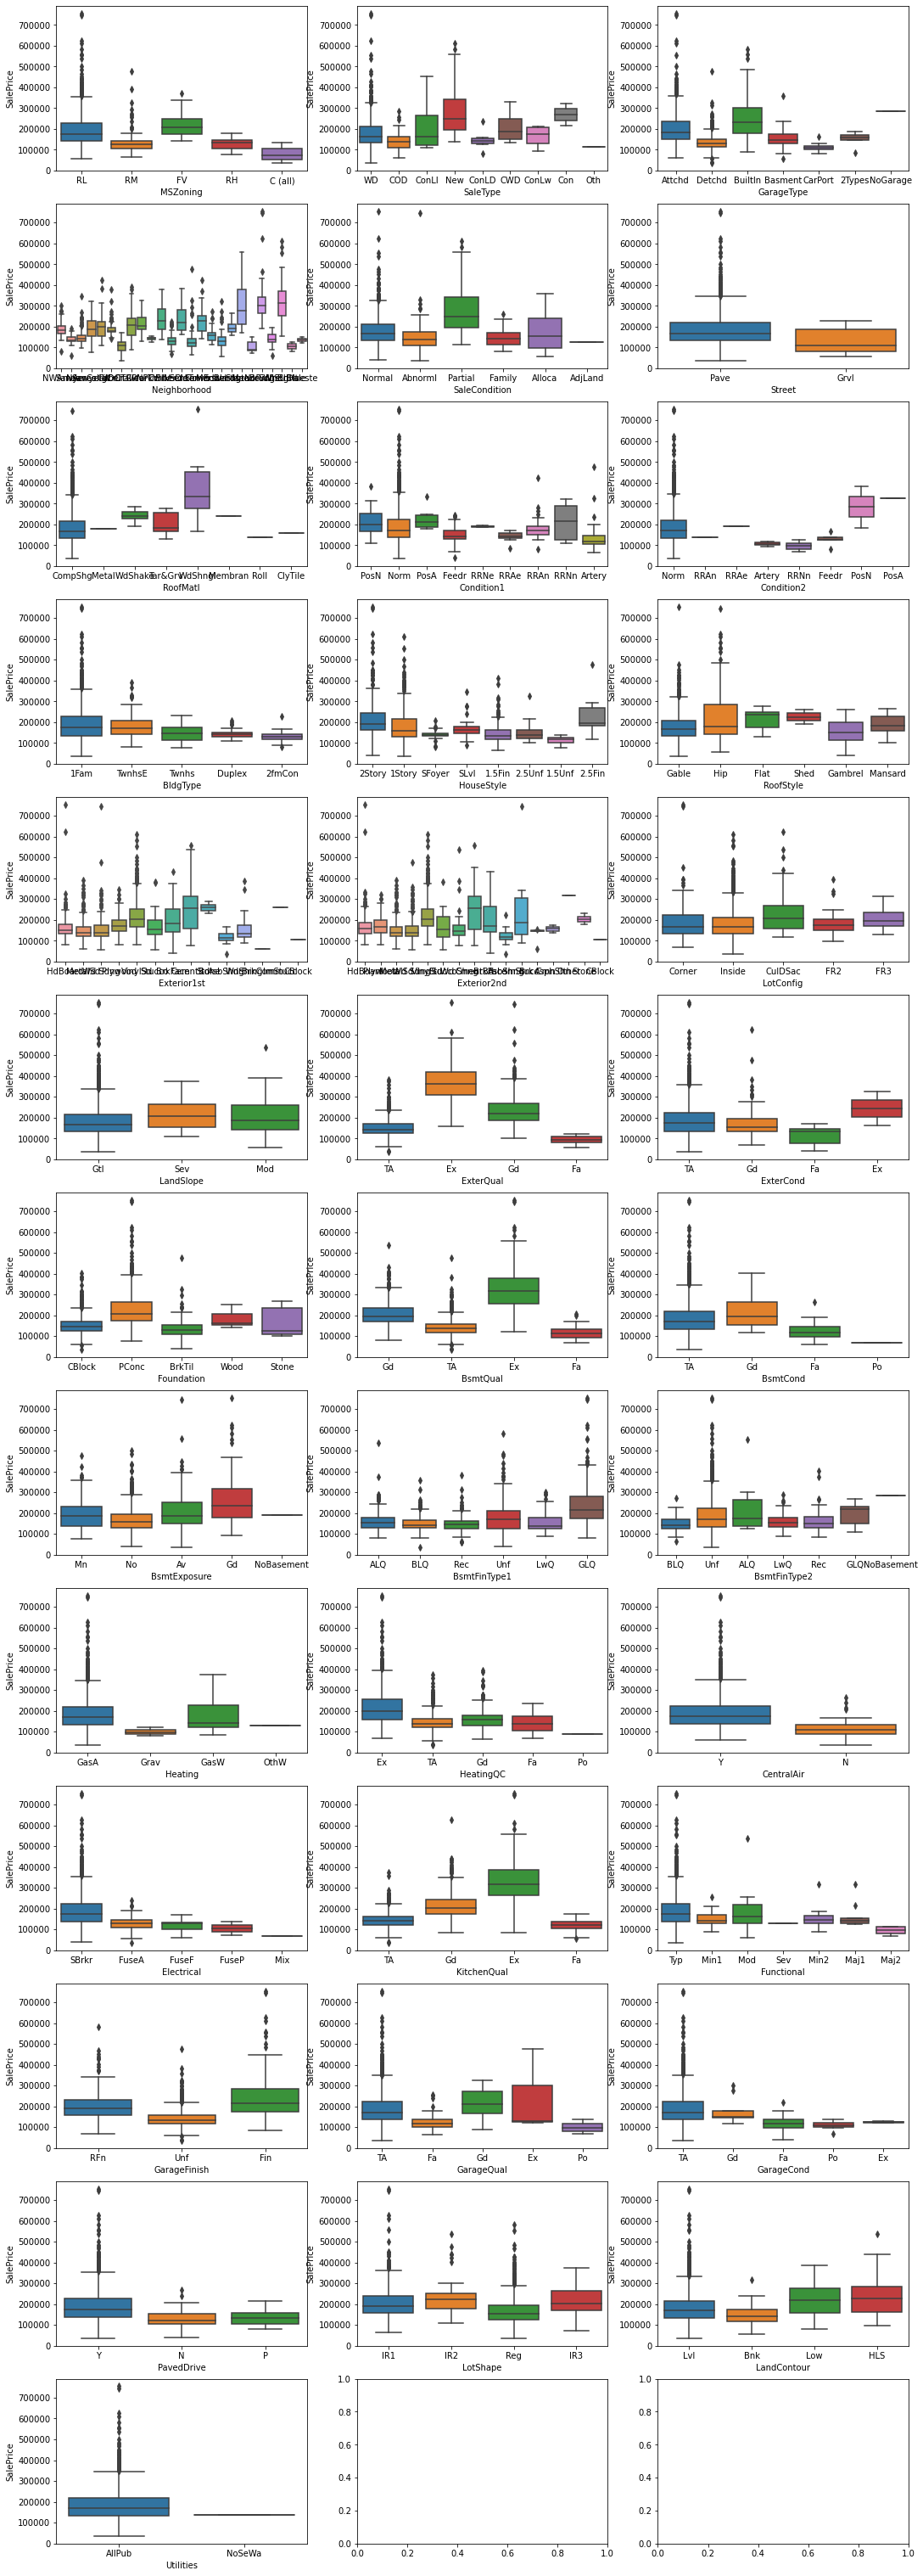

In [57]:
fig, axes = plt.subplots(13, 3, figsize=(18, 55))

sea.boxplot(ax=axes[0, 0], data=workingCategorical, x='MSZoning', y='SalePrice')
sea.boxplot(ax=axes[0, 1], data=workingCategorical, x='SaleType', y='SalePrice')
sea.boxplot(ax=axes[0, 2], data=workingCategorical, x='GarageType', y='SalePrice')
sea.boxplot(ax=axes[1, 0], data=workingCategorical, x='Neighborhood', y='SalePrice')
sea.boxplot(ax=axes[1, 1], data=workingCategorical, x='SaleCondition', y='SalePrice')
sea.boxplot(ax=axes[1, 2], data=workingCategorical, x='Street', y='SalePrice')
sea.boxplot(ax=axes[2, 0], data=workingCategorical, x='RoofMatl', y='SalePrice')
sea.boxplot(ax=axes[2, 1], data=workingCategorical, x='Condition1', y='SalePrice')
sea.boxplot(ax=axes[2, 2], data=workingCategorical, x='Condition2', y='SalePrice')
sea.boxplot(ax=axes[3, 0], data=workingCategorical, x='BldgType', y='SalePrice')
sea.boxplot(ax=axes[3, 1], data=workingCategorical, x='HouseStyle', y='SalePrice')
sea.boxplot(ax=axes[3, 2], data=workingCategorical, x='RoofStyle', y='SalePrice')
sea.boxplot(ax=axes[4, 0], data=workingCategorical, x='Exterior1st', y='SalePrice')
sea.boxplot(ax=axes[4, 1], data=workingCategorical, x='Exterior2nd', y='SalePrice')
sea.boxplot(ax=axes[4, 2],data=workingCategorical, x='LotConfig', y='SalePrice')
sea.boxplot(ax=axes[5, 0], data=workingCategorical, x='LandSlope', y='SalePrice')
sea.boxplot(ax=axes[5, 1], data=workingCategorical, x='ExterQual', y='SalePrice')
sea.boxplot(ax=axes[5, 2], data=workingCategorical, x='ExterCond', y='SalePrice')
sea.boxplot(ax=axes[6, 0], data=workingCategorical, x='Foundation', y='SalePrice')	
sea.boxplot(ax=axes[6, 1], data=workingCategorical, x='BsmtQual', y='SalePrice')	
sea.boxplot(ax=axes[6, 2], data=workingCategorical, x='BsmtCond', y='SalePrice')	
sea.boxplot(ax=axes[7, 0], data=workingCategorical, x='BsmtExposure', y='SalePrice')	
sea.boxplot(ax=axes[7, 1], data=workingCategorical, x='BsmtFinType1', y='SalePrice')	
sea.boxplot(ax=axes[7, 2], data=workingCategorical, x='BsmtFinType2', y='SalePrice')
sea.boxplot(ax=axes[8, 0], data=workingCategorical, x='Heating', y='SalePrice')	
sea.boxplot(ax=axes[8, 1], data=workingCategorical, x='HeatingQC', y='SalePrice')	
sea.boxplot(ax=axes[8, 2], data=workingCategorical, x='CentralAir', y='SalePrice')	
sea.boxplot(ax=axes[9, 0], data=workingCategorical, x='Electrical', y='SalePrice')	
sea.boxplot(ax=axes[9, 1], data=workingCategorical, x='KitchenQual', y='SalePrice')	
sea.boxplot(ax=axes[9, 2], data=workingCategorical, x='Functional', y='SalePrice')	
sea.boxplot(ax=axes[10, 0], data=workingCategorical, x='GarageFinish', y='SalePrice')	
sea.boxplot(ax=axes[10, 1], data=workingCategorical, x='GarageQual', y='SalePrice')	
sea.boxplot(ax=axes[10, 2], data=workingCategorical, x='GarageCond', y='SalePrice')	
sea.boxplot(ax=axes[11, 0], data=workingCategorical, x='PavedDrive', y='SalePrice')	
sea.boxplot(ax=axes[11, 1], data=workingCategorical, x='LotShape', y='SalePrice')	
sea.boxplot(ax=axes[11, 2], data=workingCategorical, x='LandContour', y='SalePrice')	
sea.boxplot(ax=axes[12, 0],data=workingCategorical, x='Utilities', y='SalePrice')	


In [58]:
# Split into Train/Test

# features/price Clean Train/Test
# features/price Dummies Train/Test

featuresCleanTrain, featuresCleanTest, priceCleanTrain, priceCleanTest = train_test_split(homeFeaturesClean, salePriceClean, test_size=0.2, random_state=42)
featuresDummiesTrain, featuresDummiesTest, priceDummiesTrain, priceDummiesTest = train_test_split(homeFeaturesDummies, salePriceDummies, test_size=0.2, random_state=42)


print(f'featuresCleanTrain NAs: {featuresCleanTrain.isna().sum().loc[featuresCleanTrain.isna().sum()>0].sort_values(ascending=False)}')
print('\n')
print(f'featuresDummiesTrain NAs: {featuresDummiesTrain.isna().sum().loc[featuresDummiesTrain.isna().sum()>0].sort_values(ascending=False)}')



featuresCleanTrain NAs: Series([], dtype: int64)


featuresDummiesTrain NAs: Series([], dtype: int64)


In [59]:
print(featuresDummiesTrain.shape)
print(featuresCleanTrain.shape)

(1072, 712)
(1072, 79)


In [60]:
ridge_model = linear_model.Ridge()
alphas = np.linspace(1e-3, 200, 20)
ridge_model.set_params(normalize=False)
coefs_ridge  = []
rSquaredListTest = []
rSquaredListTrain = []

for alpha in alphas:
        ridge_model.set_params(alpha=alpha)
        ridge_model.fit(featuresDummiesTrain, priceDummiesTrain)  
        coefs_ridge.append(ridge_model.coef_)
        
        rSquaredListTest.append(ridge_model.score(featuresDummiesTest, priceDummiesTest))
        rSquaredListTrain.append(ridge_model.score(featuresDummiesTrain, priceDummiesTrain))


# Plot...

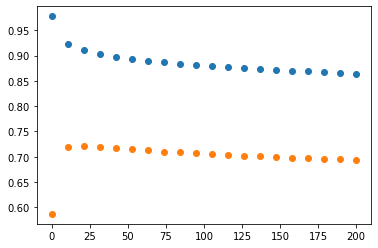

In [61]:
plt.scatter(alphas, rSquaredListTrain)
plt.scatter(alphas, rSquaredListTest)

In [86]:
# gridserach cv -  To find the best hyperparameters for the model. 

ridge_model = Ridge()

param_grid = {'alpha':np.linspace(1e-3, 200, 20)}

gsModelTrain = GridSearchCV(estimator = ridge_model, param_grid = param_grid, cv=2)
# gsModelTest = GridSearchCV(estimator = ridge_model, param_grid = param_grid, cv=2)

gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)
# gsModelTrain.fit(featuresDummiesTest, priceDummiesTest)


GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02])})

In [87]:
# Which alpha is best out of the ones we tried?
gsModelTrain.best_params_

{'alpha': 10.527263157894737}

In [88]:
# Include MSE so we can calculate RMSE (There is no RMSE function so we need np.sqrt)
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
#set to best hyperparameters from gsCV
ridge_model.set_params(**gsModelTrain.best_params_) #The asterics unpack the dictionary to enter it in as arguments
ridge_model.fit(featuresDummiesTrain, priceDummiesTrain)  #fit model again with train data

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, ridge_model.predict(featuresDummiesTest)))
print("r2 Train score:", r2_score(priceDummiesTrain, ridge_model.predict(featuresDummiesTrain)))

trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=ridge_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=ridge_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)

r2 Test score: 0.7199149587512548
r2 Train score: 0.9225601699739009
Train RMSE: 21824.944201601873
Test RMSE: 42648.89346367684


In [66]:
# gsModelTrain.cv_results_

print(gsModelTrain.best_score_)
#print(gsModelTest.best_score_)

0.7974382427908324


In [67]:
lassoModel = linear_model.Lasso(max_iter=5000)
alphas = np.linspace(1e-3, 200, 20)
lassoModel.set_params(normalize=False)
coefs_lasso  = []
rSquaredListTest = []
rSquaredListTrain = []

for alpha in alphas:
        lassoModel.set_params(alpha=alpha)
        lassoModel.fit(featuresDummiesTrain, priceDummiesTrain)  
        coefs_lasso.append(lassoModel.coef_)

        rSquaredListTest.append(lassoModel.score(featuresDummiesTest, priceDummiesTest))
        rSquaredListTrain.append(lassoModel.score(featuresDummiesTrain, priceDummiesTrain))

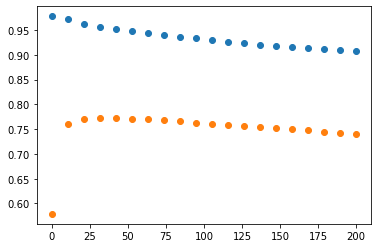

In [68]:
plt.scatter(alphas, rSquaredListTrain)
plt.scatter(alphas, rSquaredListTest)

In [69]:
### WORKING HERE!!!!!!!!!!!!!!!!!!!!!!!!!! ##########################3


# gridserach cv # CHANGE TO LASSO!!!!!!

lasso_model = Lasso()

param_grid = {'alpha':np.linspace(1e-3, 200, 20)}

gsModelTrain = GridSearchCV(estimator = lasso_model, param_grid = param_grid, cv=2)
# gsModelTest = GridSearchCV(estimator = lasso_model, param_grid = param_grid, cv=2)

gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)
# gsModelTest.fit(featuresDummiesTest, priceDummiesTest)



GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02])})

In [70]:
print("Best Score:", gsModelTrain.best_score_)
print("Best Params:", gsModelTrain.best_params_)

Best Score: 0.819498748682343
Best Params: {'alpha': 94.73736842105264}


In [71]:
#Set to best hyperparameters from gsCV
# ** will unpack and only take the VALUE of the dictionary.

# Best score is the average of all "kfolds" from CV


lasso_model.set_params(**gsModelTrain.best_params_)


#fit to train data
lasso_model.fit(featuresDummiesTrain, priceDummiesTrain)

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, lasso_model.predict(featuresDummiesTest)))

trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=lasso_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=lasso_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)

r2 Test score: 0.7631715528341366
Train RMSE: 20304.979921810147
Test RMSE: 39217.48545329139


In [72]:

print(gsModelTrain.best_score_)


#print(gsModelTest.best_score_)

0.819498748682343


In [73]:


elastic_model = ElasticNet()
param_grid = {'alpha':np.linspace(1e-3, 100, 5), "l1_ratio":np.linspace(1e-3, 1, 5)}

gsModelTrain = GridSearchCV(estimator = elastic_model, param_grid = param_grid, cv=2)

gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)




### NORMALIZE DOES SOMETHING!!! LOOK IT UP!!!!

### WHAT IS GOING ON HERE?

GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'l1_ratio': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ])})

In [91]:
# R2 increases when you increase the number of features!
# 

# So, R2 is less reliable. 
# RMSE is square root of the average of how far off it is from the regressionline (squared)

elastic_model.set_params(**gsModelTrain.best_params_)


#fit to train data
elastic_model.fit(featuresDummiesTrain, priceDummiesTrain)

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, elastic_model.predict(featuresDummiesTest)))
print("r2 Train score:", r2_score(priceDummiesTrain, elastic_model.predict(featuresDummiesTrain)))
trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=elastic_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=elastic_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)

r2 Test score: 0.7598071688691653
r2 Train score: 0.9710500786718035
Train RMSE: 13344.264463426109
Test RMSE: 39495.06482698925


In [37]:
#next

# what features are important?
# why impute and what type of impute.
# Which missingness is important?
# standardization of values, make sure that they are normally distributed.

# stocastic gradiant decent. 

In [95]:

### Random forest

rf_model = RandomForestRegressor()
param_grid = {'max_depth':np.arange(5, 25, 5), 'min_samples_split':np.arange(2, 6, 2)}
gsModelTrain = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=2)
gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)

rf_model.set_params(**gsModelTrain.best_params_)


#fit to train data
rf_model.fit(featuresDummiesTrain, priceDummiesTrain)

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, rf_model.predict(featuresDummiesTest)))
print("r2 Train score:", r2_score(priceDummiesTrain, rf_model.predict(featuresDummiesTrain)))
trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=rf_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=rf_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)



r2 Test score: 0.8286008225836293
r2 Train score: 0.9776681485380445
Train RMSE: 11720.153825473131
Test RMSE: 33363.159912236355


In [76]:
print(len(rfModel.feature_importances_))
featuresDummiesTrain.shape

712


(1072, 712)

In [77]:
rfModel.feature_importances_


feature_importances = pd.DataFrame(rfModel.feature_importances_,
                                   index = featuresDummiesTrain.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(feature_importances)


# Seperate EDA and analysis!!

feature_importances.index[:10]

#Show a ranking of these most important features (in bar plot)


                           importance
OverallQual              5.559609e-01
GrLivArea                9.929112e-02
TotalBsmtSF              4.050054e-02
1stFlrSF                 3.604577e-02
TotRmsAbvGrd             2.772576e-02
FullBath                 2.693519e-02
BsmtFinSF1               2.064975e-02
GarageCars               1.915783e-02
2ndFlrSF                 1.753713e-02
GarageArea               1.748563e-02
LotArea                  1.219073e-02
YearBuilt                1.075511e-02
LotFrontage              7.270100e-03
YearRemodAdd             7.038709e-03
BsmtQual_Ex              5.726935e-03
OpenPorchSF              4.677578e-03
BsmtUnfSF                4.245650e-03
MoSold                   3.397142e-03
OverallCond              3.180477e-03
WoodDeckSF               2.865491e-03
KitchenQual_Gd           2.692117e-03
ExterQual_Ex             2.253200e-03
GarageType_Detchd        1.832978e-03
MSSubClass               1.808349e-03
BsmtFullBath             1.791505e-03
MSZoning_RM 

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd',
       'FullBath', 'BsmtFinSF1', 'GarageCars', '2ndFlrSF', 'GarageArea'],
      dtype='object')

In [114]:
# Boosting

# Ensamble after built a decision tree model, then build another based on the weighted model!!!


###


boosting_model = GradientBoostingRegressor()
param_grid = {'n_estimators':np.arange(5, 500, 10)}


gsModelTrain = GridSearchCV(estimator = boosting_model, param_grid = param_grid, cv=2)
gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)

boosting_model.set_params(**gsModelTrain.best_params_)


#fit to train data
boosting_model.fit(featuresDummiesTrain, priceDummiesTrain)

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, boosting_model.predict(featuresDummiesTest)))
print("r2 Train score:", r2_score(priceDummiesTrain, boosting_model.predict(featuresDummiesTrain)))
trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=boosting_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=boosting_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)



r2 Test score: 0.8605406312509528
r2 Train score: 0.988875603478824
Train RMSE: 8271.974306776943
Test RMSE: 30094.467137082185


In [113]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [109]:
#KNN

knn_model = KNeighborsRegressor()
param_grid = {'n_neighbors':np.arange(5, 200, 5)}

gsModelTrain = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv=2)
gsModelTrain.fit(featuresDummiesTrain, priceDummiesTrain)

knn_model.set_params(**gsModelTrain.best_params_)

#fit to train data
knn_model.fit(featuresDummiesTrain, priceDummiesTrain)

#Get scores comparing real house prices and predicted house prices from the test dataset.
print("r2 Test score:", r2_score(priceDummiesTest, knn_model.predict(featuresDummiesTest)))
print("r2 Train score:", r2_score(priceDummiesTrain, knn_model.predict(featuresDummiesTrain)))
trainRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTrain, y_pred=knn_model.predict(featuresDummiesTrain)))
testRMSE = np.sqrt(mean_squared_error(y_true=priceDummiesTest, y_pred=knn_model.predict(featuresDummiesTest)))
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)




r2 Test score: 0.6307760069201898
r2 Train score: 0.7662448448900541
Train RMSE: 37918.53459536937
Test RMSE: 48967.481488778656


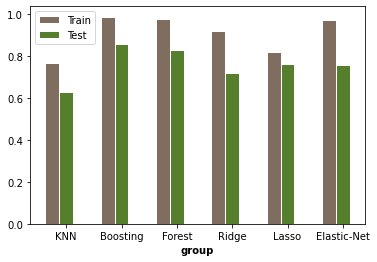

In [115]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.7662, 0.9888, 0.9776, 0.9225, 0.8194, 0.9711]
bars2 = [0.6307, 0.8605, 0.8286, 0.7199, 0.7631, 0.7598]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Test')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['KNN', 'Boosting', 'Forest', 'Ridge', 'Lasso', 'Elastic-Net'])
 
# Create legend & Show graphic
plt.legend()
plt.show()



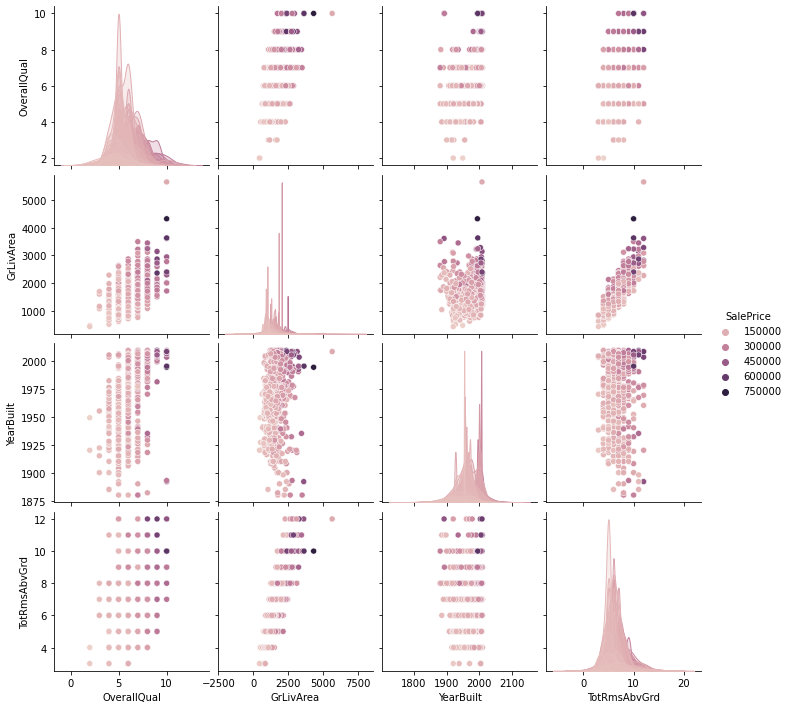

In [117]:
### Pair Plot of important features

# OverallQual              5.559609e-01
# GrLivArea                9.929112e-02
# TotalBsmtSF              4.050054e-02
# 1stFlrSF                 3.604577e-02
# TotRmsAbvGrd             2.772576e-02
# FullBath                 2.693519e-02

pairPlotDf = featuresDummiesTrain[['OverallQual', 'GrLivArea', 'YearBuilt', 'TotRmsAbvGrd']]

pairPlotDf['SalePrice'] = priceDummiesTrain
sea.pairplot(pairPlotDf, hue='SalePrice')

In [45]:
pairPlotDf.head()

NameError: name 'pairPlotDf' is not defined

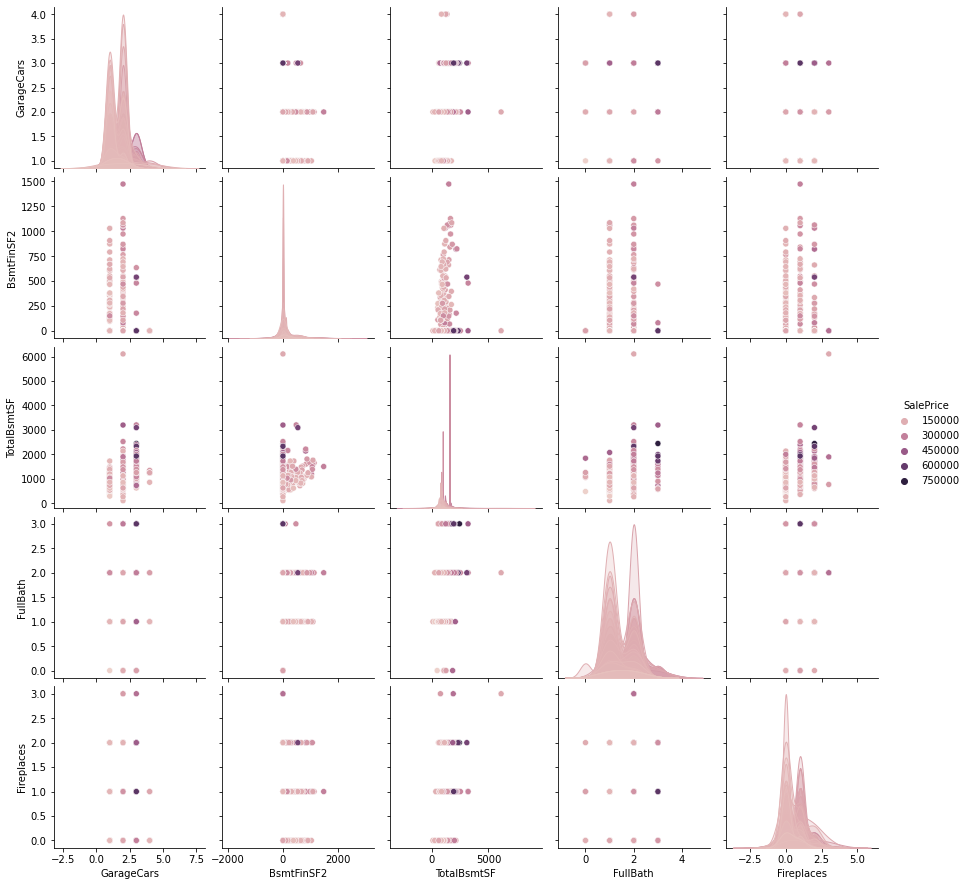

In [107]:
# Pair Plot

pairPlotDf = featuresDummiesTrain[['GarageCars', 'BsmtFinSF2', 'TotalBsmtSF', 'FullBath', 'Fireplaces']]

pairPlotDf['SalePrice'] = priceDummiesTrain

sea.pairplot(pairPlotDf, hue='SalePrice')

In [108]:
featuresTrainImputed.corr()


# correlation plot!!! 
# make a heat. 



NameError: name 'featuresTrainImputed' is not defined